In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline


In [2]:
#import data
orderdetails_data = pd.read_csv(r"C:\Users\CHINELO\Desktop\Data\Restaurant+Orders+CSV\order_details.csv")
menuitem_data = pd.read_csv(r"C:\Users\CHINELO\Desktop\Data\Restaurant+Orders+CSV\menu_items.csv")

menuitem_data.head(50)

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00
5,106,French Fries,American,7.00
6,107,Orange Chicken,Asian,16.50
7,108,Tofu Pad Thai,Asian,14.50
8,109,Korean Beef Bowl,Asian,17.95
9,110,Pork Ramen,Asian,17.95


In [3]:
#rename column 
menuitem_data.rename(columns={'menu_item_id': 'item_id'},inplace=True) 
#merge the dataframe
restaurant_data= menuitem_data.merge(orderdetails_data, on='item_id', how='left')

In [4]:
#understand the data
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           12097 non-null  int64  
 1   item_name         12097 non-null  object 
 2   category          12097 non-null  object 
 3   price             12097 non-null  float64
 4   order_details_id  12097 non-null  int64  
 5   order_id          12097 non-null  int64  
 6   order_date        12097 non-null  object 
 7   order_time        12097 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 756.2+ KB


The data doesn't contain empty cell,need to change date and time format

In [5]:
#Concat date and time
restaurant_data['order_datetime'] = pd.to_datetime(restaurant_data['order_date'].str.cat(restaurant_data['order_time'], sep=' '),format='%m/%d/%Y %I:%M:%S %p')
restaurant_data.head()

,item_id,item_name,category,price,order_details_id,order_id,order_date,order_time,order_datetime
0,101,Hamburger,American,12.95,11,6,01/01/2023,12:29:36 PM,2023-01-01 12:29:36
1,101,Hamburger,American,12.95,26,11,01/01/2023,1:02:59 PM,2023-01-01 13:02:59
2,101,Hamburger,American,12.95,43,17,01/01/2023,1:53:00 PM,2023-01-01 13:53:00
3,101,Hamburger,American,12.95,63,24,01/01/2023,2:23:01 PM,2023-01-01 14:23:01
4,101,Hamburger,American,12.95,71,27,01/01/2023,3:11:17 PM,2023-01-01 15:11:17


In [6]:
#data description
restaurant_data.describe()

,item_id,price,order_details_id,order_id,order_datetime
count,12097.000000,12097.000000,12097.000000,12097.000000,12097
mean,115.202282,13.161767,6118.950897,2692.569149,2023-02-15 03:37:44.676200704
min,101.000000,5.000000,1.000000,1.000000,2023-01-01 11:38:36
25%,107.000000,10.500000,3064.000000,1353.000000,2023-01-23 16:21:26
50%,114.000000,13.950000,6119.000000,2711.000000,2023-02-14 20:00:33
75%,123.000000,16.500000,9175.000000,4020.000000,2023-03-09 15:30:34
max,132.000000,19.950000,12234.000000,5370.000000,2023-03-31 22:15:48
std,9.387580,3.986392,3531.337208,1545.826452,NaN


In [7]:
#check for duplicates
if restaurant_data.duplicated().sum() == 0:
    print('No duplicate')
else:
    print('Yes duplicate')

No duplicate


## 1.0 What were the least and most ordered item? What category were they in?

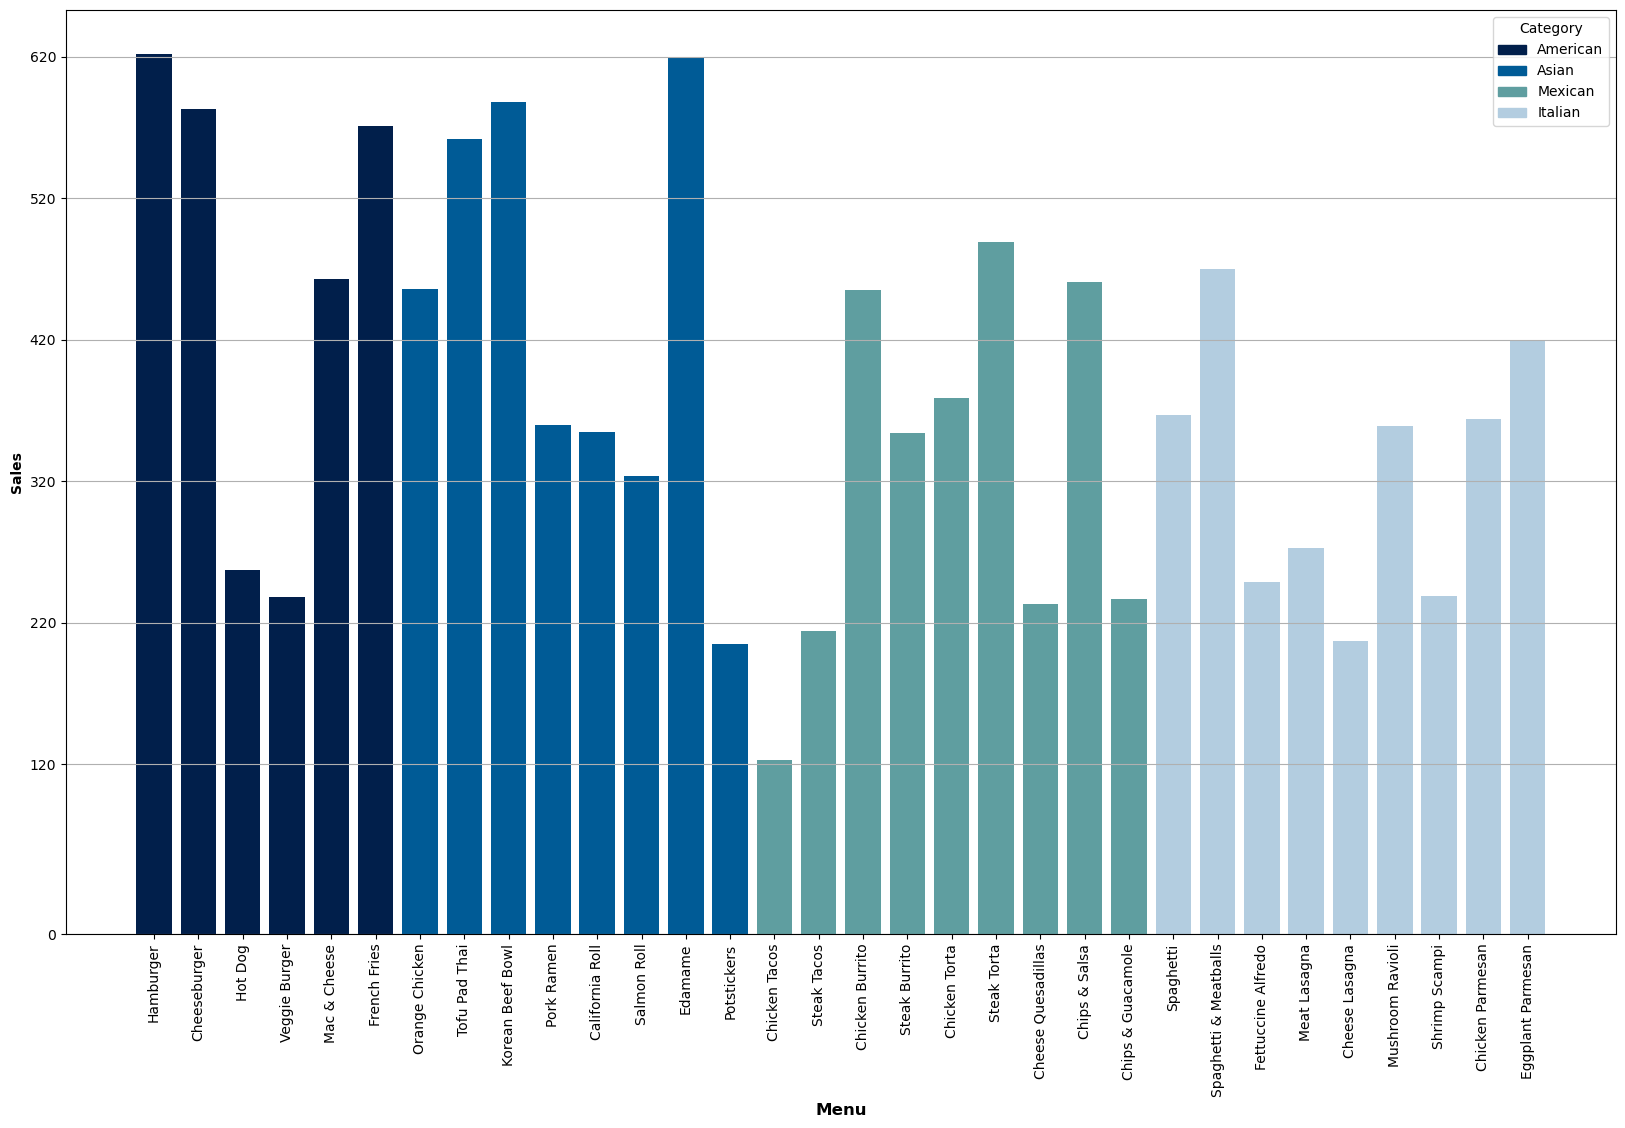

In [8]:
least_most = restaurant_data.groupby('item_name', sort=False).count().reset_index()
fig, ax = plt.subplots(figsize=(20,12))
colors = menuitem_data['category'].apply(lambda x: '#011f4b' if x == 'American' else
                                     ('#005b96' if x == 'Asian' else 
                                     ('#b3cde0' if x == 'Italian' else '#5F9EA0')))
ax.bar(least_most['item_name'],least_most['category'], color=colors)
plt.xticks(least_most['item_name'])
plt.xticks(rotation=90)
y_ticks = [0, 120, 220, 320, 420, 520, 620]
ax.set_yticks(y_ticks)

# Add labels and title
ax.set_ylabel('Sales', fontweight='bold')
plt.xlabel("Menu", fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('', fontdict={'fontsize': 16, 'fontweight': 'bold'})


# Add a legend
legend_handles = [patches.Patch(color='#011f4b', label='American'), 
                  patches.Patch(color='#005b96', label='Asian'),
                  patches.Patch(color='#5F9EA0', label='Mexican'),
                  patches.Patch(color='#b3cde0', label='Italian')]
ax.legend(handles=legend_handles, title='Category')
plt.grid(axis='y')

# Show the plot
plt.show()

The most ordered is Hamburger an American dish while least ordered is Chicken Tacos a Mexican dish.

## 2.0 What do the highest spend order look like?, which item did they buy?

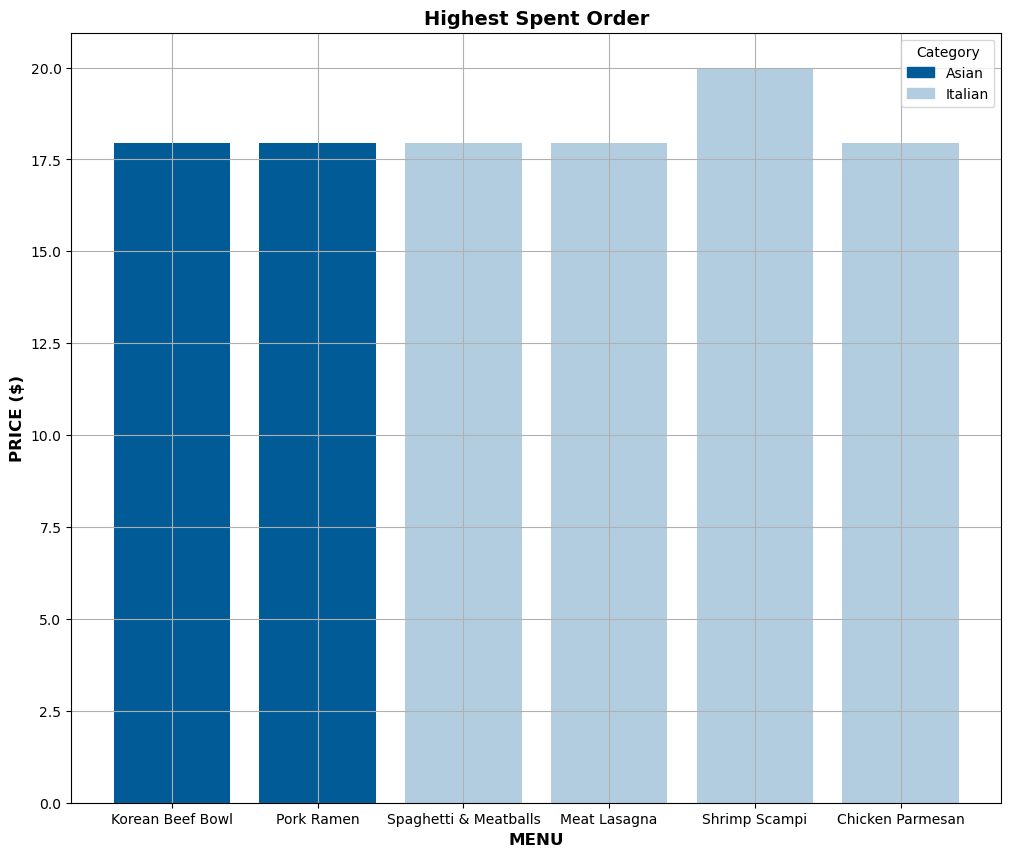

In [9]:
value = restaurant_data.groupby('item_name').filter(lambda x: max(x['price']) > 17.5)
colors = value['category'].apply(lambda x :'#011f4b' if x == 'American' else
                                     ('#005b96' if x == 'Asian' else 
                                     ('#b3cde0' if x == 'Italian' else '#5F9EA0')))

fig, ax = plt.subplots(figsize=(12,10))
ax.bar(value['item_name'], value['price'], color=colors)

# Add labels and title
plt.title('Highest Spent Order', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('MENU', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.grid('y')
plt.ylabel('PRICE ($)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# Add a legend
legend_handles = [patches.Patch(color='#005b96', label='Asian'),
                  patches.Patch(color='#b3cde0', label='Italian')]
ax.legend(handles=legend_handles, title='Category')

# Show the plot
plt.show()

## 3.0 Were they certain times that had more or less orders?

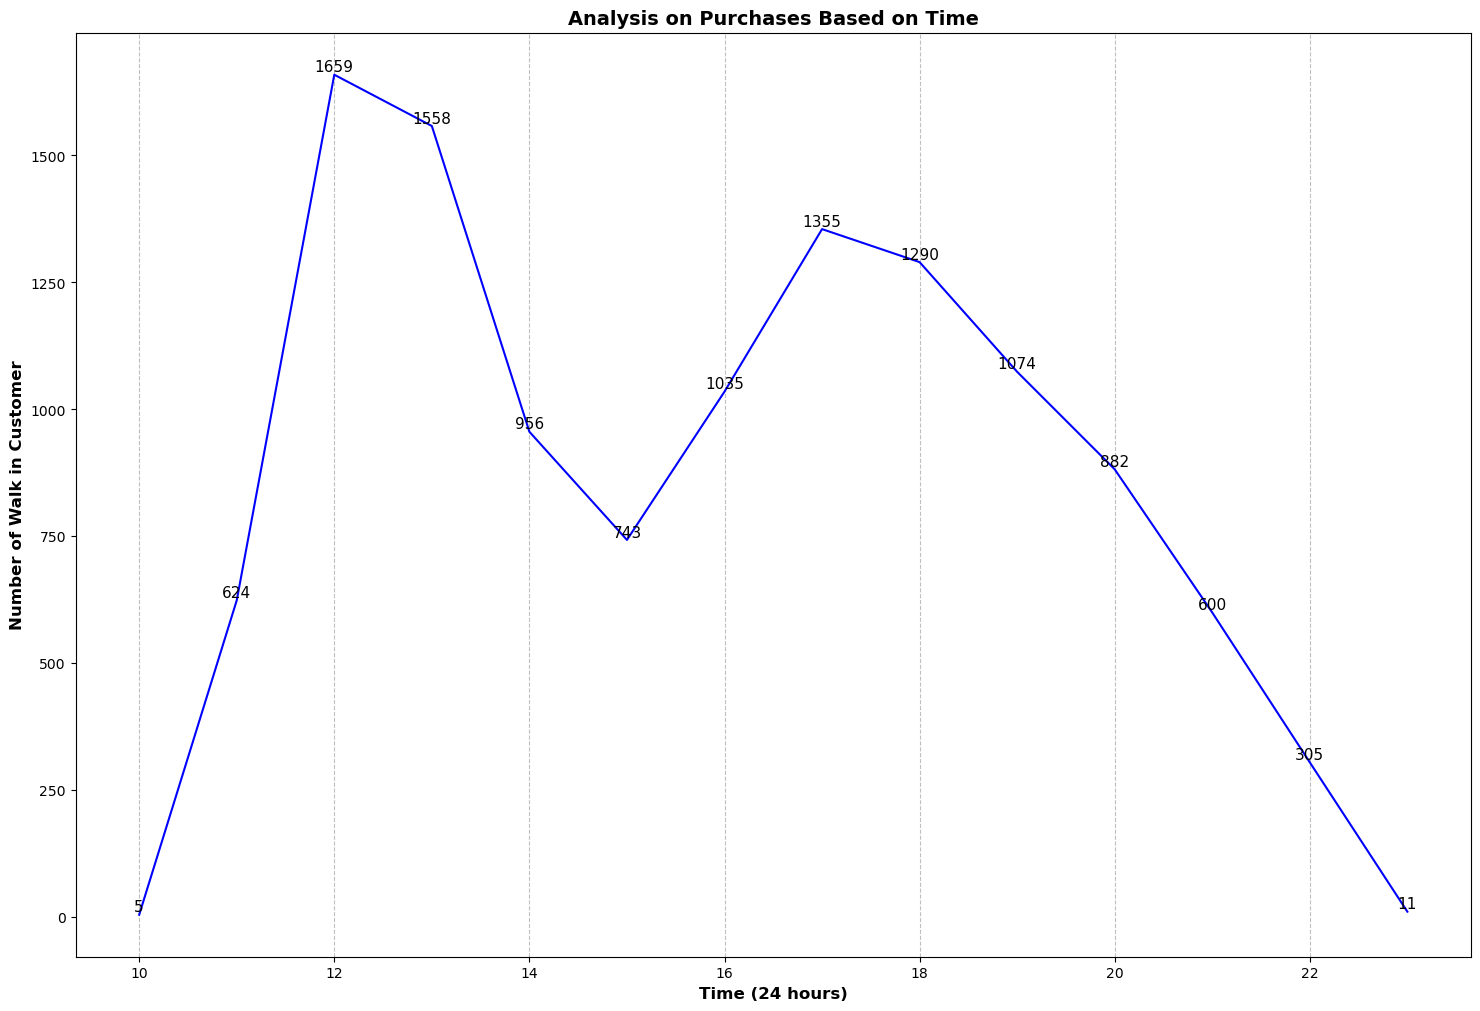

In [10]:
# exctracting the hour from time
restaurant_data.loc[:, 'order_hour'] = restaurant_data['order_datetime'].dt.hour
date_time = restaurant_data.groupby('order_hour')['order_details_id'].count()

#plot of line chart
fig,ax = plt.subplots(figsize=(18,12))
plt.plot(date_time.index, date_time.values, color='b')
plt.grid(axis='x', linestyle='--', alpha=0.8)
for x, y in zip(date_time.index, date_time.values):
    plt.text(x, y, str(y), fontsize=11, ha='center', va='bottom')
plt.xlabel('Time (24 hours)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Number of Walk in Customer', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Analysis on Purchases Based on Time', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Show the plot    
plt.show()

## 4.0 Which cusines and category should we focus on developing based on the data?

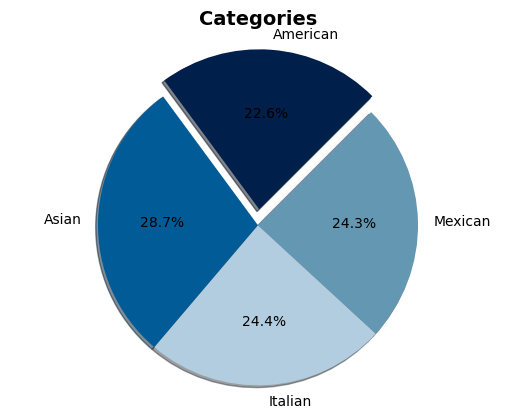

In [11]:
cusines = restaurant_data.groupby('category')['item_id'].count()


labels= ['American', "Asian", 'Italian', 'Mexican']
color = {'#011f4b':'American','#005b96':'Asian','#b3cde0':'Italian','#6497b1':'Mexican'}
plt.pie(cusines, autopct='%1.1f%%', startangle=45, shadow=True, labels=labels, radius=2, explode=[0.2,0,0,0], colors=color)
plt.title('Categories', fontdict={'fontsize': 14, 'fontweight': 'bold'} )
plt.axis('equal')

# Show the plot
plt.show()